# Genetic Mutation Analysis with pyMut

This notebook demonstrates how to generate genetic mutation data visualizations using **pyMut**. It shows both the complete summary and individual visualizations in the simplest possible way. Each plot method is shown with default parameters first, followed by a commented version with all available parameters.

## 📊 SAVING OPTIONS REFERENCE

This notebook demonstrates multiple ways to save figures with different quality settings:

### 1. **AUTOMATIC HIGH QUALITY (RECOMMENDED)**:
```python
PyMutation.configure_high_quality_plots()  # Configure once at the beginning
fig.savefig('plot.png')                    # Automatically DPI=300, bbox_inches='tight'
```

### 2. **MANUAL HIGH QUALITY**:
```python
fig.savefig('plot.png', dpi=300, bbox_inches='tight')
```

### 3. **CENTRALIZED METHOD**:
```python
py_mut.save_figure(fig, 'plot.png')        # Uses pyMut's centralized method
```

### 4. **CUSTOM QUALITY**:
```python
fig.savefig('plot.png', dpi=600, bbox_inches='tight', facecolor='white')
```

### 5. **DIFFERENT FORMATS**:
```python
fig.savefig('plot.pdf', dpi=300, bbox_inches='tight')  # PDF
fig.savefig('plot.svg', bbox_inches='tight')           # SVG (vector)
fig.savefig('plot.jpg', dpi=300, bbox_inches='tight')  # JPEG
```

## 🎯 DPI QUALITY LEVELS:
- **72-100**: Screen quality (small files, pixelated when printed)
- **150-200**: Good quality (medium files)
- **300**: Publication quality (large files, crisp printing) ⭐ **RECOMMENDED**
- **600+**: Ultra-high quality (very large files, professional printing)

## 📐 BBOX_INCHES OPTIONS:
- **None**: Fixed margins (may waste space)
- **'tight'**: Automatic margins (removes unnecessary whitespace) ⭐ **RECOMMENDED**

## 📦 Imports and Setup

In [16]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter notebook configuration
%matplotlib inline

# Add src directory to path
sys.path.insert(0, os.path.abspath(os.path.join('..')))

# Import PyMutation
from src.pyMut import PyMutation

print("✅ Imports completed successfully!")

✅ Imports completed successfully!


## ⚙️ STEP 0: Configure High Quality (RECOMMENDED)

Configure pyMut to automatically save all figures in high quality with optimal settings.

In [17]:
# ========================================================================
# STEP 0: Configure high quality once (RECOMMENDED)
# ========================================================================
print("⚙️  Configuring automatic high quality...")
PyMutation.configure_high_quality_plots()
print("✅ All figures will now be saved automatically in high quality!")

⚙️  Configuring automatic high quality...
✅ High-quality configuration activated for matplotlib
   • DPI: 300 (high resolution)
   • Margins: automatic (tight)
   • Format: optimized PNG
   ℹ️  Now all figures will be automatically saved in high quality
✅ All figures will now be saved automatically in high quality!


## 📂 Data Loading

Load the TCGA-LAML example dataset included with pyMut.

In [18]:
# Get the absolute path to the project directory
project_dir = os.path.abspath(os.path.join(".."))

# Path to the example file
tsv_file = os.path.join(project_dir, "src", "pyMut", "data", "examples", "tcga_laml_converted.tsv")

# Check if the file exists
if not os.path.exists(tsv_file):
    print(f"Error: The file {tsv_file} does not exist.")
    raise FileNotFoundError(f"Dataset not found: {tsv_file}")
else:
    print(f"✅ Dataset found: {tsv_file}")

# Read the data
mutation_data = pd.read_csv(tsv_file, sep='\t')
print(f"📊 Dataset loaded: {mutation_data.shape[0]} mutations, {mutation_data.shape[1]} columns")

# Display basic info about the dataset
# Note: This dataset is in \"wide\" format where samples are columns (TCGA-AB-*)
print(f"📋 Available genes: {mutation_data['Hugo_Symbol'].nunique() if 'Hugo_Symbol' in mutation_data.columns else 'N/A'}")
sample_columns = [col for col in mutation_data.columns if col.startswith('TCGA-')]
print(f"👥 Sample columns found: {len(sample_columns)}")
print(f"🧬 Variant classifications: {mutation_data['Variant_Classification'].nunique() if 'Variant_Classification' in mutation_data.columns else 'N/A'}")

✅ Dataset found: /home/xuscbart/pyMut/src/pyMut/data/examples/tcga_laml_converted.tsv
📊 Dataset loaded: 2207 mutations, 212 columns
📋 Available genes: 1611
👥 Sample columns found: 193
🧬 Variant classifications: 12


### 🔍 Quick Data Exploration

In [19]:
# Preview the data
print("📋 First 5 rows of the dataset:")
display(mutation_data.head())

print("\n📊 Available columns:")
print(f"Total columns: {len(mutation_data.columns)}")
print(f"First 10 columns: {mutation_data.columns[:10].tolist()}")
print(f"Sample columns (TCGA-*): {len(sample_columns)}")

📋 First 5 rows of the dataset:


,CHROM,POS,ID,REF,ALT,FILTER,TCGA-AB-2988,TCGA-AB-2869,TCGA-AB-3009,TCGA-AB-2830,...,NCBI_Build,Chromosome,Start_position,End_Position,Strand,Variant_Classification,Variant_Type,Protein_Change,i_TumorVAF_WU,i_transcript_name
0,17,67170916,.,T,C,PASS,T|C,T|T,T|T,T|T,...,37,17,67170917,67170917,+,SPLICE_SITE,SNP,p.K960R,45.660000,NM_080282.3
1,1,94490593,.,C,T,PASS,C|C,C|T,C|C,C|C,...,37,1,94490594,94490594,+,MISSENSE_MUTATION,SNP,p.R1517H,38.120000,NM_000350.2
2,2,169780249,.,G,A,PASS,G|G,G|G,G|A,G|G,...,37,2,169780250,169780250,+,MISSENSE_MUTATION,SNP,p.A1283V,46.972177,NM_003742.2
3,16,48244996,.,G,A,PASS,G|G,G|G,G|G,G|A,...,37,16,48244997,48244997,+,SILENT,SNP,p.I490I,34.270000,NM_032583.3
4,17,48760973,.,C,T,PASS,C|C,C|C,C|C,C|C,...,37,17,48760974,48760974,+,MISSENSE_MUTATION,SNP,p.P1271S,56.410000,NM_003786.1



📊 Available columns:
Total columns: 212
First 10 columns: ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'FILTER', 'TCGA-AB-2988', 'TCGA-AB-2869', 'TCGA-AB-3009', 'TCGA-AB-2830']
Sample columns (TCGA-*): 193


In [20]:
# Check if we have the required columns for visualizations
required_columns = ['Hugo_Symbol', 'Variant_Classification']
available_columns = [col for col in required_columns if col in mutation_data.columns]

print(f"📊 Required columns for visualizations:")
for col in required_columns:
    status = "✅" if col in mutation_data.columns else "❌"
    print(f"  {status} {col}")

if 'Variant_Classification' in mutation_data.columns:
    print(f"\n🧬 Variant Classification distribution:")
    variant_counts = mutation_data['Variant_Classification'].value_counts()
    display(variant_counts.head(10))
    print(f"\n🔬 Total unique variant types: {len(variant_counts)}")
else:
    print("\n⚠️  Variant_Classification column not found - will attempt to extract from FUNCOTATION")

📊 Required columns for visualizations:
  ✅ Hugo_Symbol
  ✅ Variant_Classification

🧬 Variant Classification distribution:


MISSENSE_MUTATION    1342
SILENT                449
NONSENSE_MUTATION     103
SPLICE_SITE            92
FRAME_SHIFT_INS        91
FRAME_SHIFT_DEL        52
IN_FRAME_INS           42
RNA                    10
IN_FRAME_DEL           10
INTRON                  8
Name: Variant_Classification, dtype: int64


🔬 Total unique variant types: 12


## 🏗️ Create PyMutation Object

The PyMutation class automatically handles data preprocessing, including:
- Detection of wide vs long format data
- Extraction of variant classifications from FUNCOTATION if needed
- Data conversion for visualization compatibility

In [21]:
# Creating PyMutation object
print("Creating PyMutation object...")
py_mut = PyMutation(mutation_data)
print("✅ PyMutation object created successfully!")
print("📋 Data preprocessing completed automatically")

Creating PyMutation object...
✅ PyMutation object created successfully!
📋 Data preprocessing completed automatically


---

# 📈 Visualizations

## 1. 📊 Complete Summary Plot

Generate the main summary plot that combines multiple visualizations in a single figure.


1. Generating complete summary plot...
Detected 193 sample columns
Detected sample format: pipe_separated


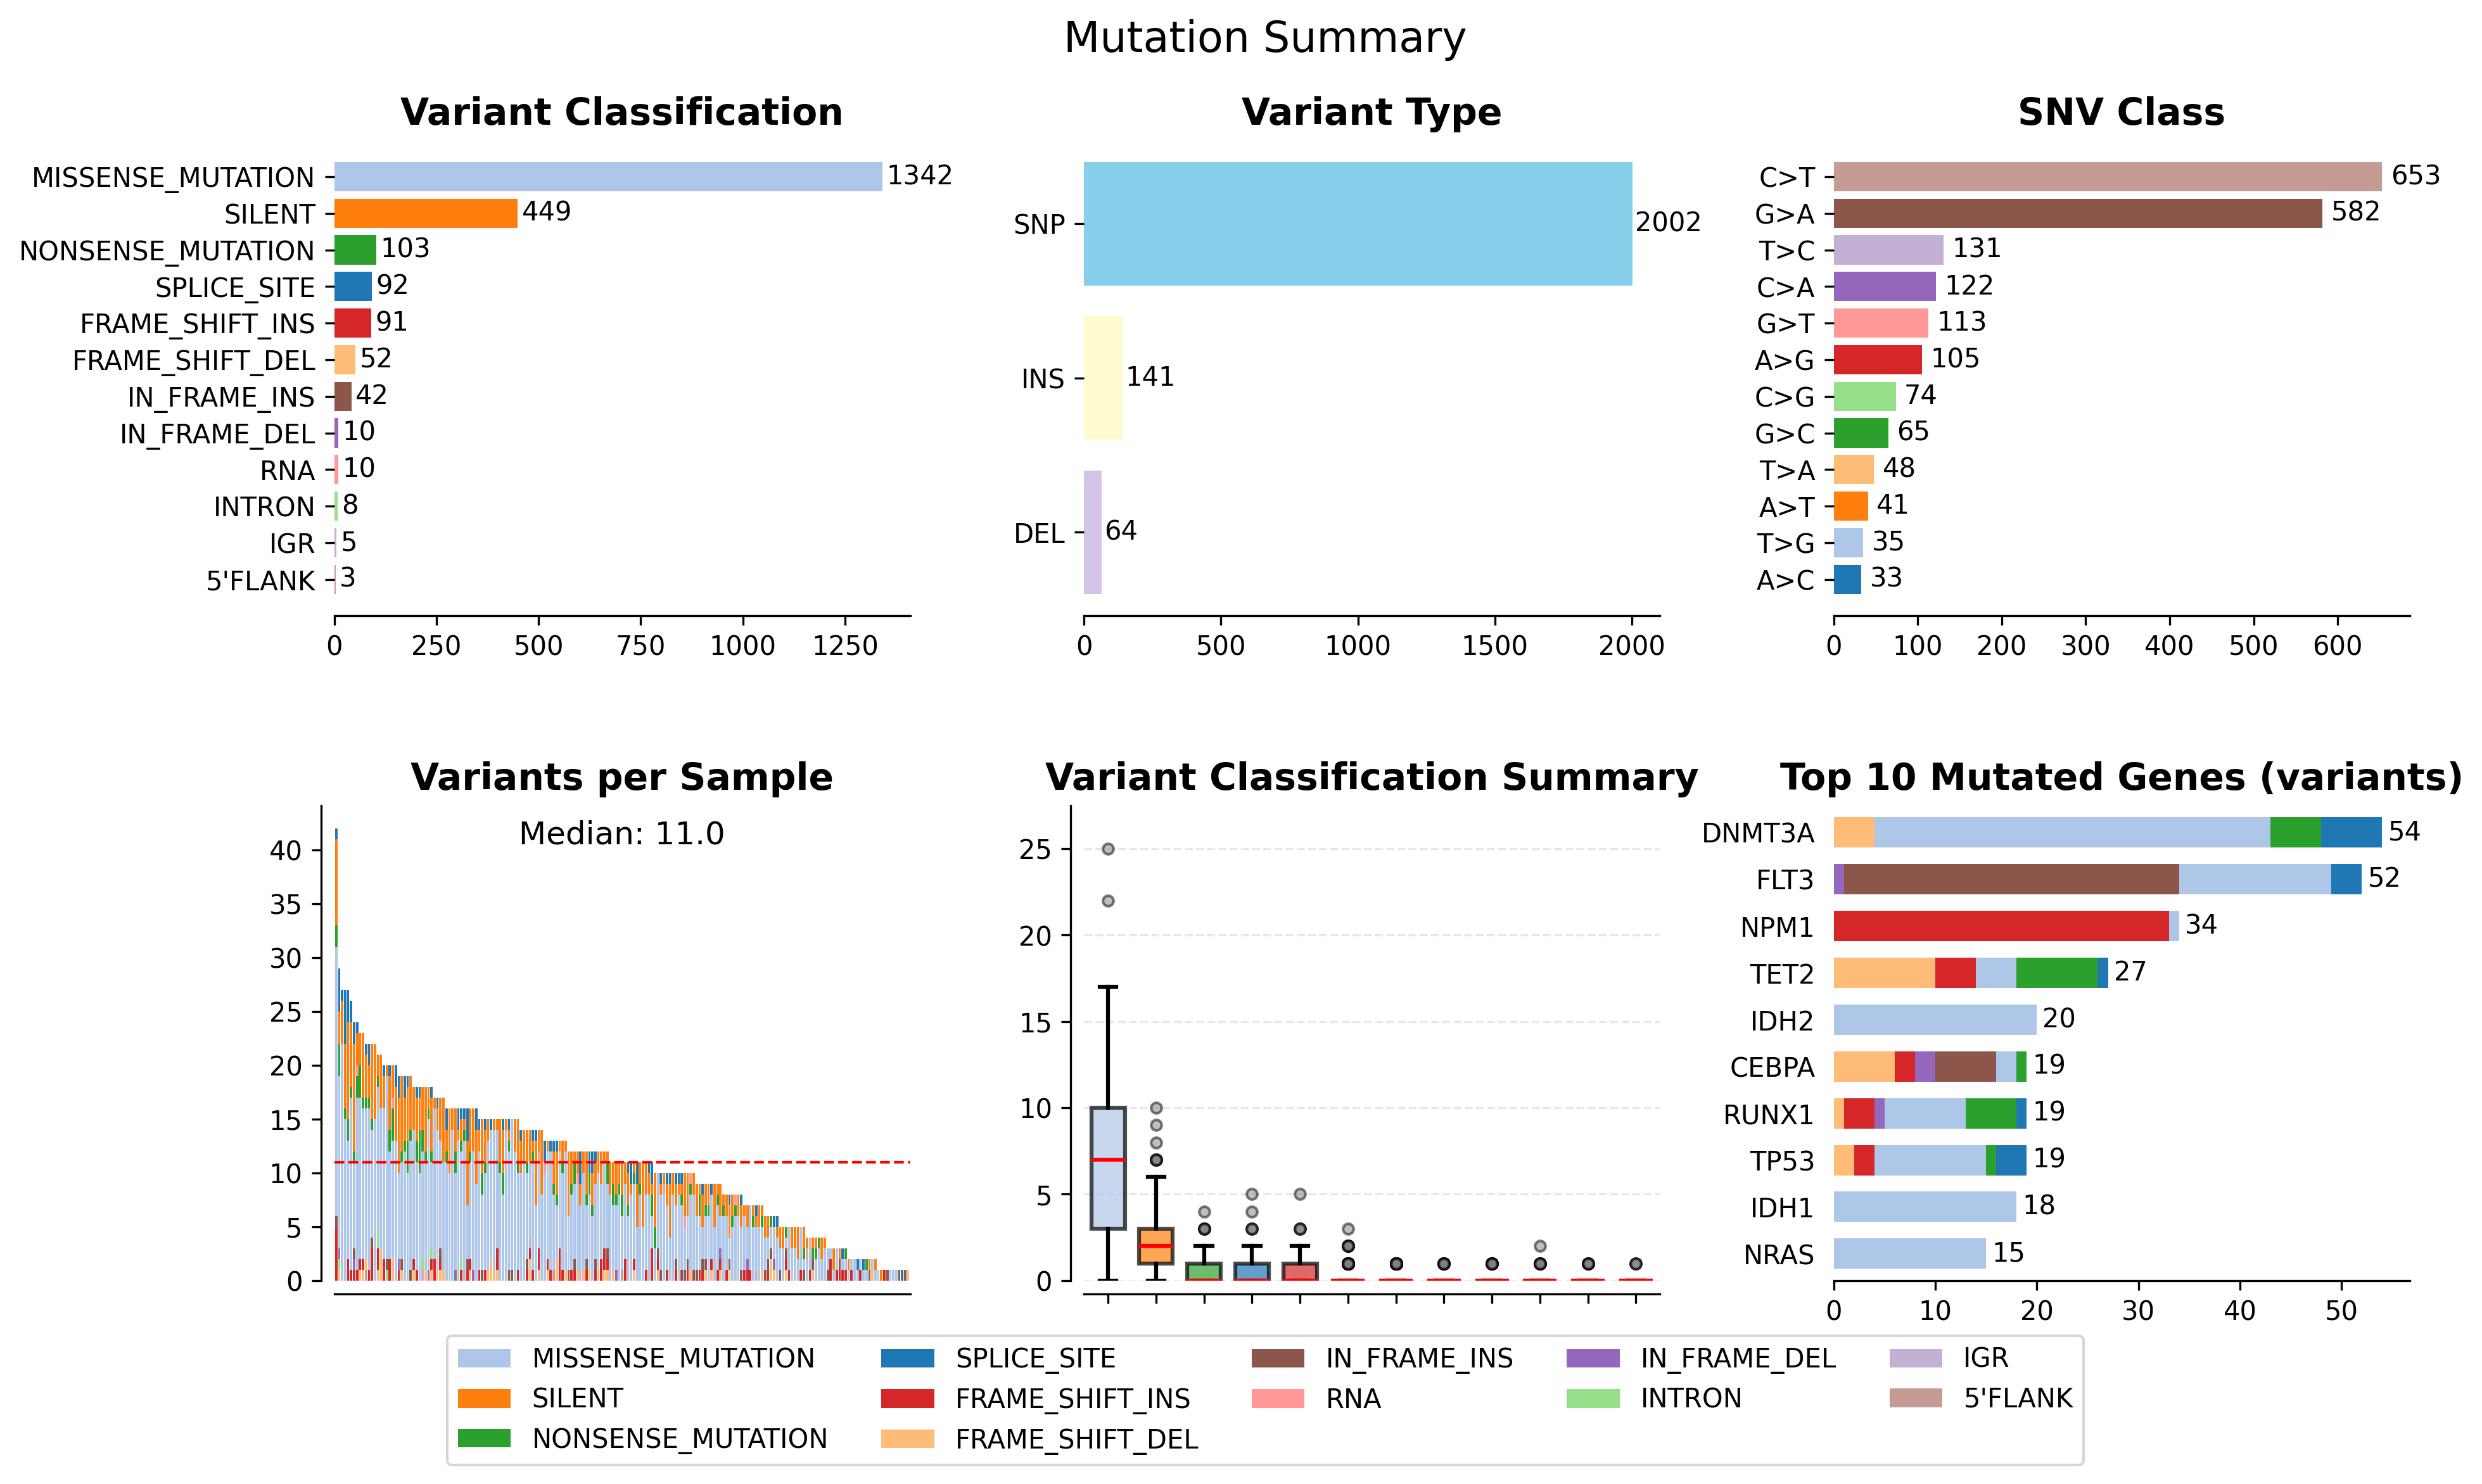

✅ Summary plot saved as 'summary_plot.png'


In [22]:
# 1. Generate the complete summary plot
print("\n1. Generating complete summary plot...")
summary_fig = py_mut.summary_plot()

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
summary_fig.savefig('summary_plot.png')
print("✅ Summary plot saved as 'summary_plot.png'")

### 🔧 Summary Plot - All Available Parameters (Commented)

Here's how to use all available parameters for the summary plot:

In [23]:
# Commented version with all available parameters:
# summary_fig = py_mut.summary_plot(
#     title=\"Example summary plot\",     # Custom title for the plot
#     figsize=(16, 12),                 # Figure size in inches (width, height)
#     max_samples=50,                   # Maximum number of samples to display
#     top_genes_count=5,                # Number of genes to show in Top Mutated Genes (default is 10)
#     show_interactive=True             # Whether to show the plot interactively
# )

print("📝 Summary plot parameters explained above (commented out)")

📝 Summary plot parameters explained above (commented out)


### 💾 Alternative Saving Methods (Examples)

Multiple ways to save the summary plot with different quality settings:

In [24]:
# Alternative saving methods (commented examples):

# Method 1: Manual high quality parameters
# summary_fig.savefig('summary_plot.png', dpi=300, bbox_inches='tight')

# Method 2: Using pyMut's centralized save_figure() method
# py_mut.save_figure(summary_fig, 'summary_plot.png')

# Method 3: Custom quality settings
# summary_fig.savefig('summary_plot.png', dpi=600, bbox_inches='tight', 
#                     facecolor='white', edgecolor='none', transparent=False)

# Method 4: Different formats
# summary_fig.savefig('summary_plot.pdf', dpi=300, bbox_inches='tight')  # PDF
# summary_fig.savefig('summary_plot.svg', bbox_inches='tight')           # SVG (vector)
# summary_fig.savefig('summary_plot.jpg', dpi=300, bbox_inches='tight')  # JPEG

print("📝 Alternative saving methods shown above (commented out)")

📝 Alternative saving methods shown above (commented out)


---

## 2. 🧬 Variant Classification Plot

Distribution of variant classification types (Missense, Nonsense, etc.)


2. Generating variant classification plot...


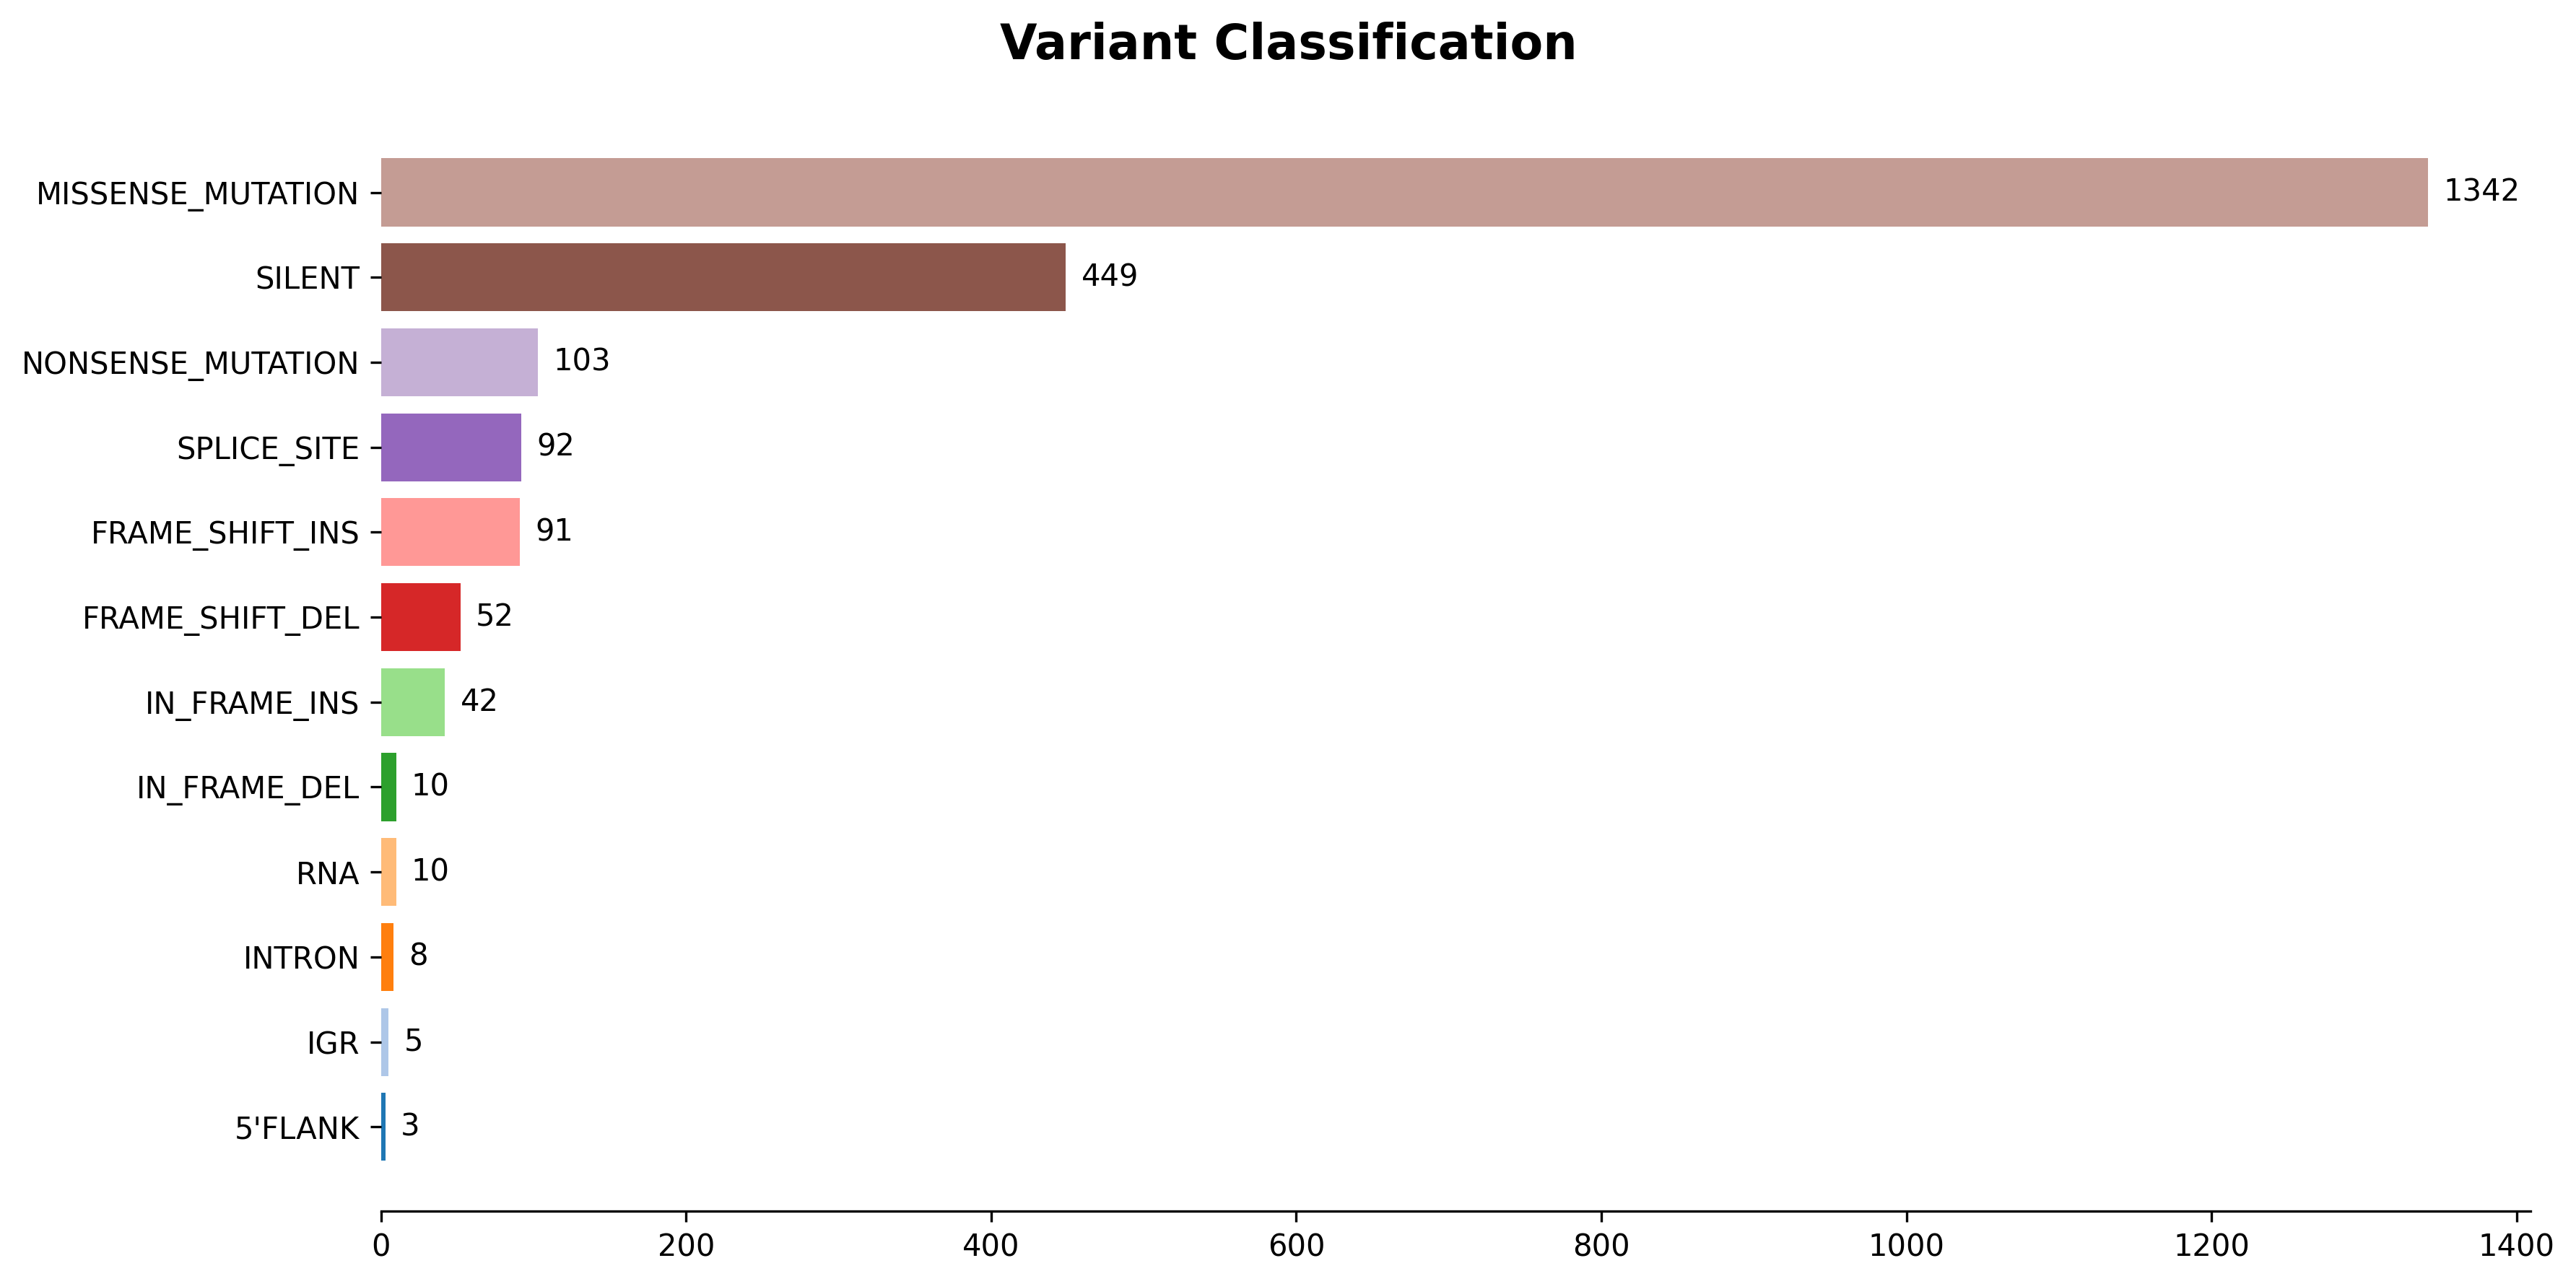

✅ Variant classification plot saved as 'variant_classification.png'


In [25]:
# 2. Variant Classification Plot
print("\n2. Generating variant classification plot...")
vc_fig = py_mut.variant_classification_plot()

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
vc_fig.savefig('variant_classification.png')
print("✅ Variant classification plot saved as 'variant_classification.png'")

In [26]:
# Commented version with all available parameters:
# vc_fig = py_mut.variant_classification_plot(
#     figsize=(12, 6),                  # Figure size in inches (width, height)
#     title=\"Variant Classification\",   # Custom title for the plot
#     show_interactive=True             # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# vc_fig.savefig('variant_classification.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(vc_fig, 'variant_classification.png')
# vc_fig.savefig('variant_classification.pdf', dpi=300, bbox_inches='tight')

print("📝 Variant classification parameters and saving methods shown above (commented out)")

📝 Variant classification parameters and saving methods shown above (commented out)


---

## 3. 🔄 Variant Type Plot

Distribution of variant types (SNP, INS, DEL, etc.)


3. Generating variant types plot...


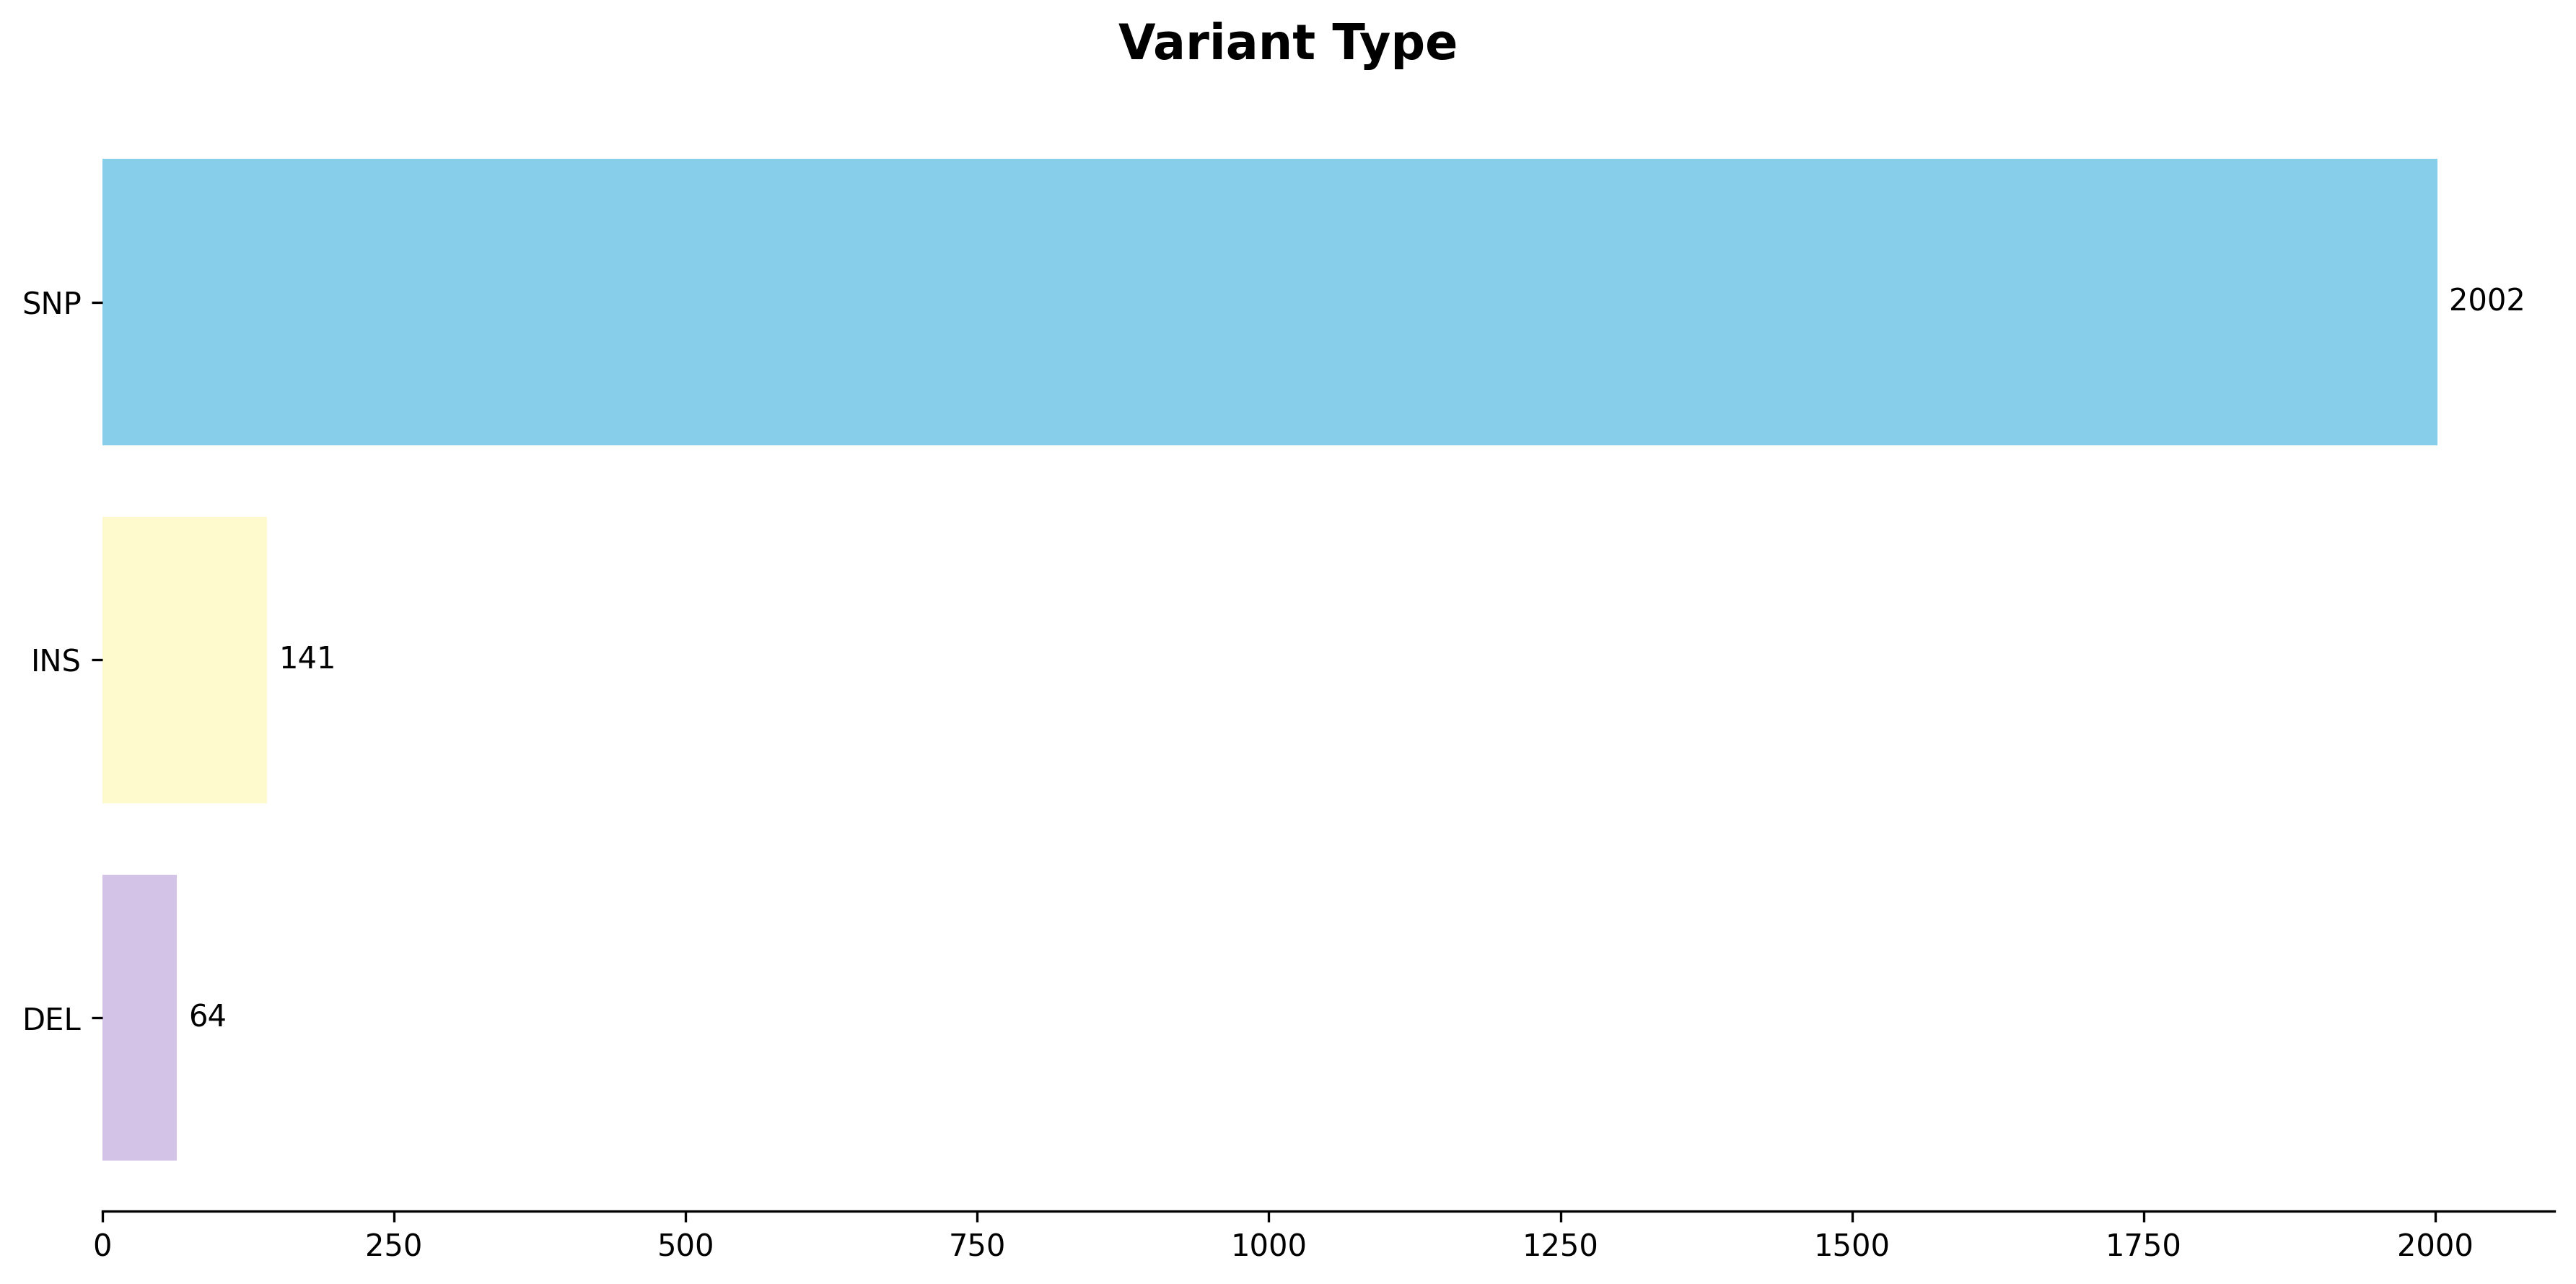

✅ Variant type plot saved as 'variant_type.png'


In [27]:
# 3. Variant Type Plot
print("\n3. Generating variant types plot...")
vt_fig = py_mut.variant_type_plot()

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
vt_fig.savefig('variant_type.png')
print("✅ Variant type plot saved as 'variant_type.png'")

In [28]:
# Commented version with all available parameters:
# vt_fig = py_mut.variant_type_plot(
#     figsize=(12, 6),                  # Figure size in inches (width, height)
#     title=\"Variant Type\",             # Custom title for the plot
#     show_interactive=True             # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# vt_fig.savefig('variant_type.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(vt_fig, 'variant_type.png')
# vt_fig.savefig('variant_type.pdf', dpi=300, bbox_inches='tight')

print("📝 Variant type parameters and saving methods shown above (commented out)")

📝 Variant type parameters and saving methods shown above (commented out)


---

## 4. 🧪 SNV Class Plot

Distribution of SNV classes (nucleotide changes like A>G, C>T, etc.)


4. Generating SNV classes plot...


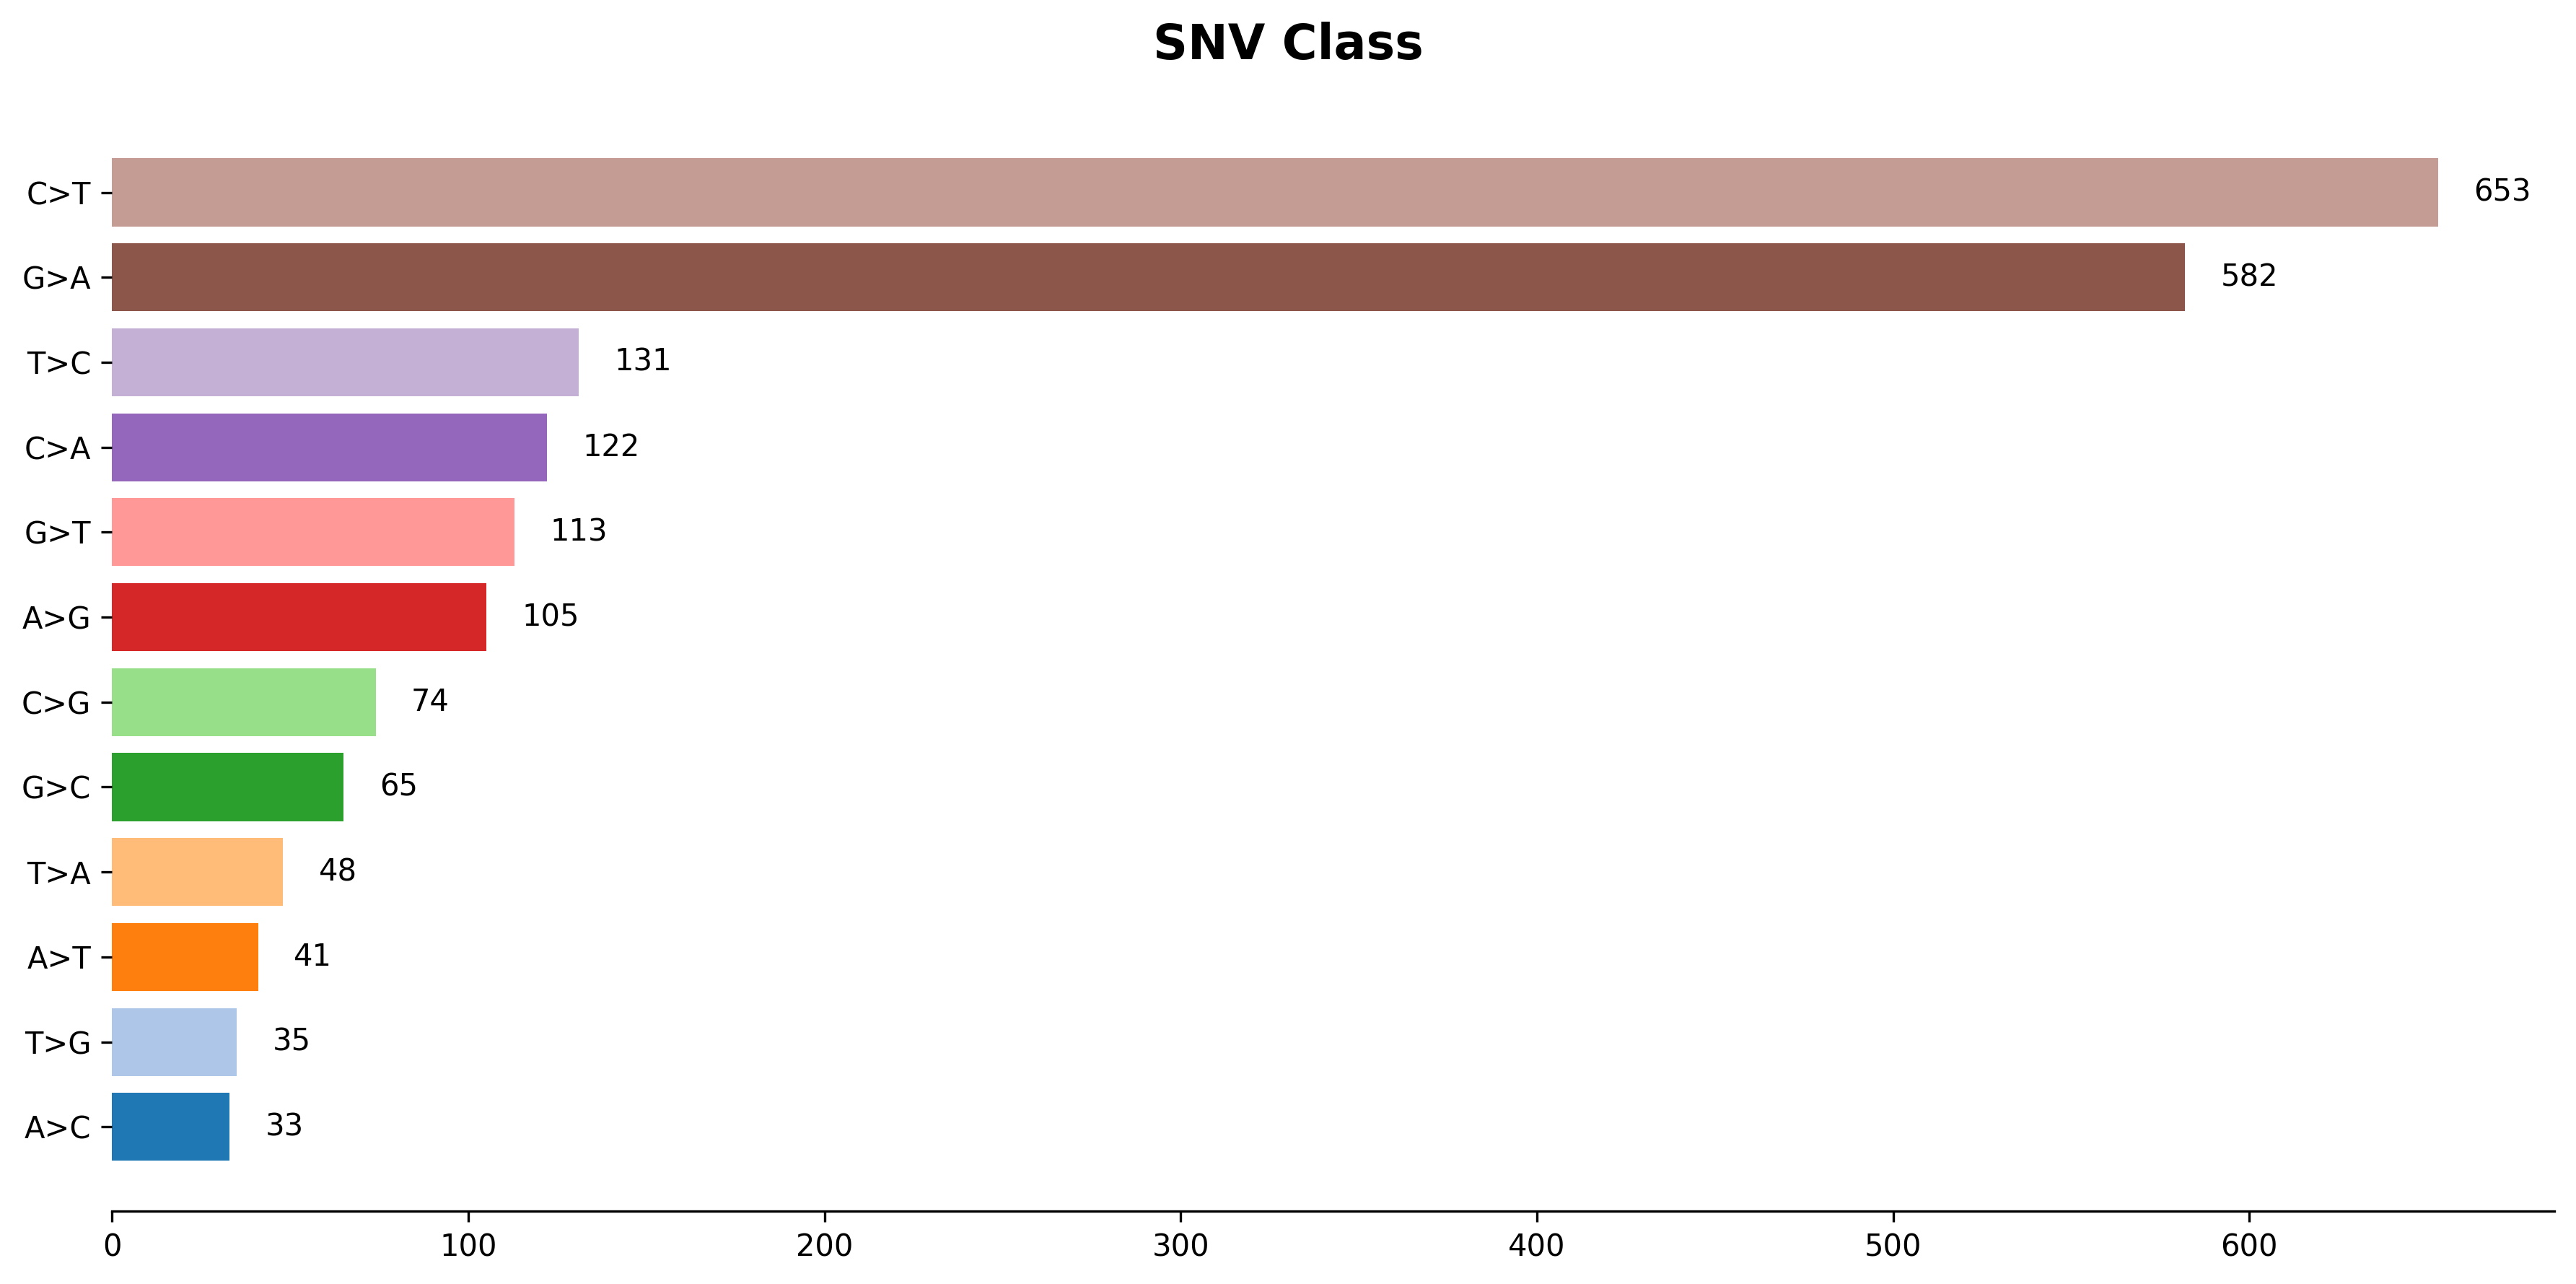

✅ SNV class plot saved as 'snv_class.png'


In [29]:
# 4. SNV Class Plot
print("\n4. Generating SNV classes plot...")
snv_fig = py_mut.snv_class_plot()

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
snv_fig.savefig('snv_class.png')
print("✅ SNV class plot saved as 'snv_class.png'")

In [30]:
# Commented version with all available parameters:
# snv_fig = py_mut.snv_class_plot(
#     figsize=(12, 6),                  # Figure size in inches (width, height)
#     title=\"SNV Class\",                # Custom title for the plot
#     ref_column=\"REF\",                 # Column containing reference allele
#     alt_column=\"ALT\",                 # Column containing alternate allele
#     show_interactive=True             # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# snv_fig.savefig('snv_class.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(snv_fig, 'snv_class.png')
# snv_fig.savefig('snv_class.pdf', dpi=300, bbox_inches='tight')

print("📝 SNV class parameters and saving methods shown above (commented out)")

📝 SNV class parameters and saving methods shown above (commented out)


---

## 5. 📊 Variants per Sample Plot (TMB)

Tumor Mutation Burden - distribution of variants across samples with median line.


5. Generating variants per sample plot (TMB)...


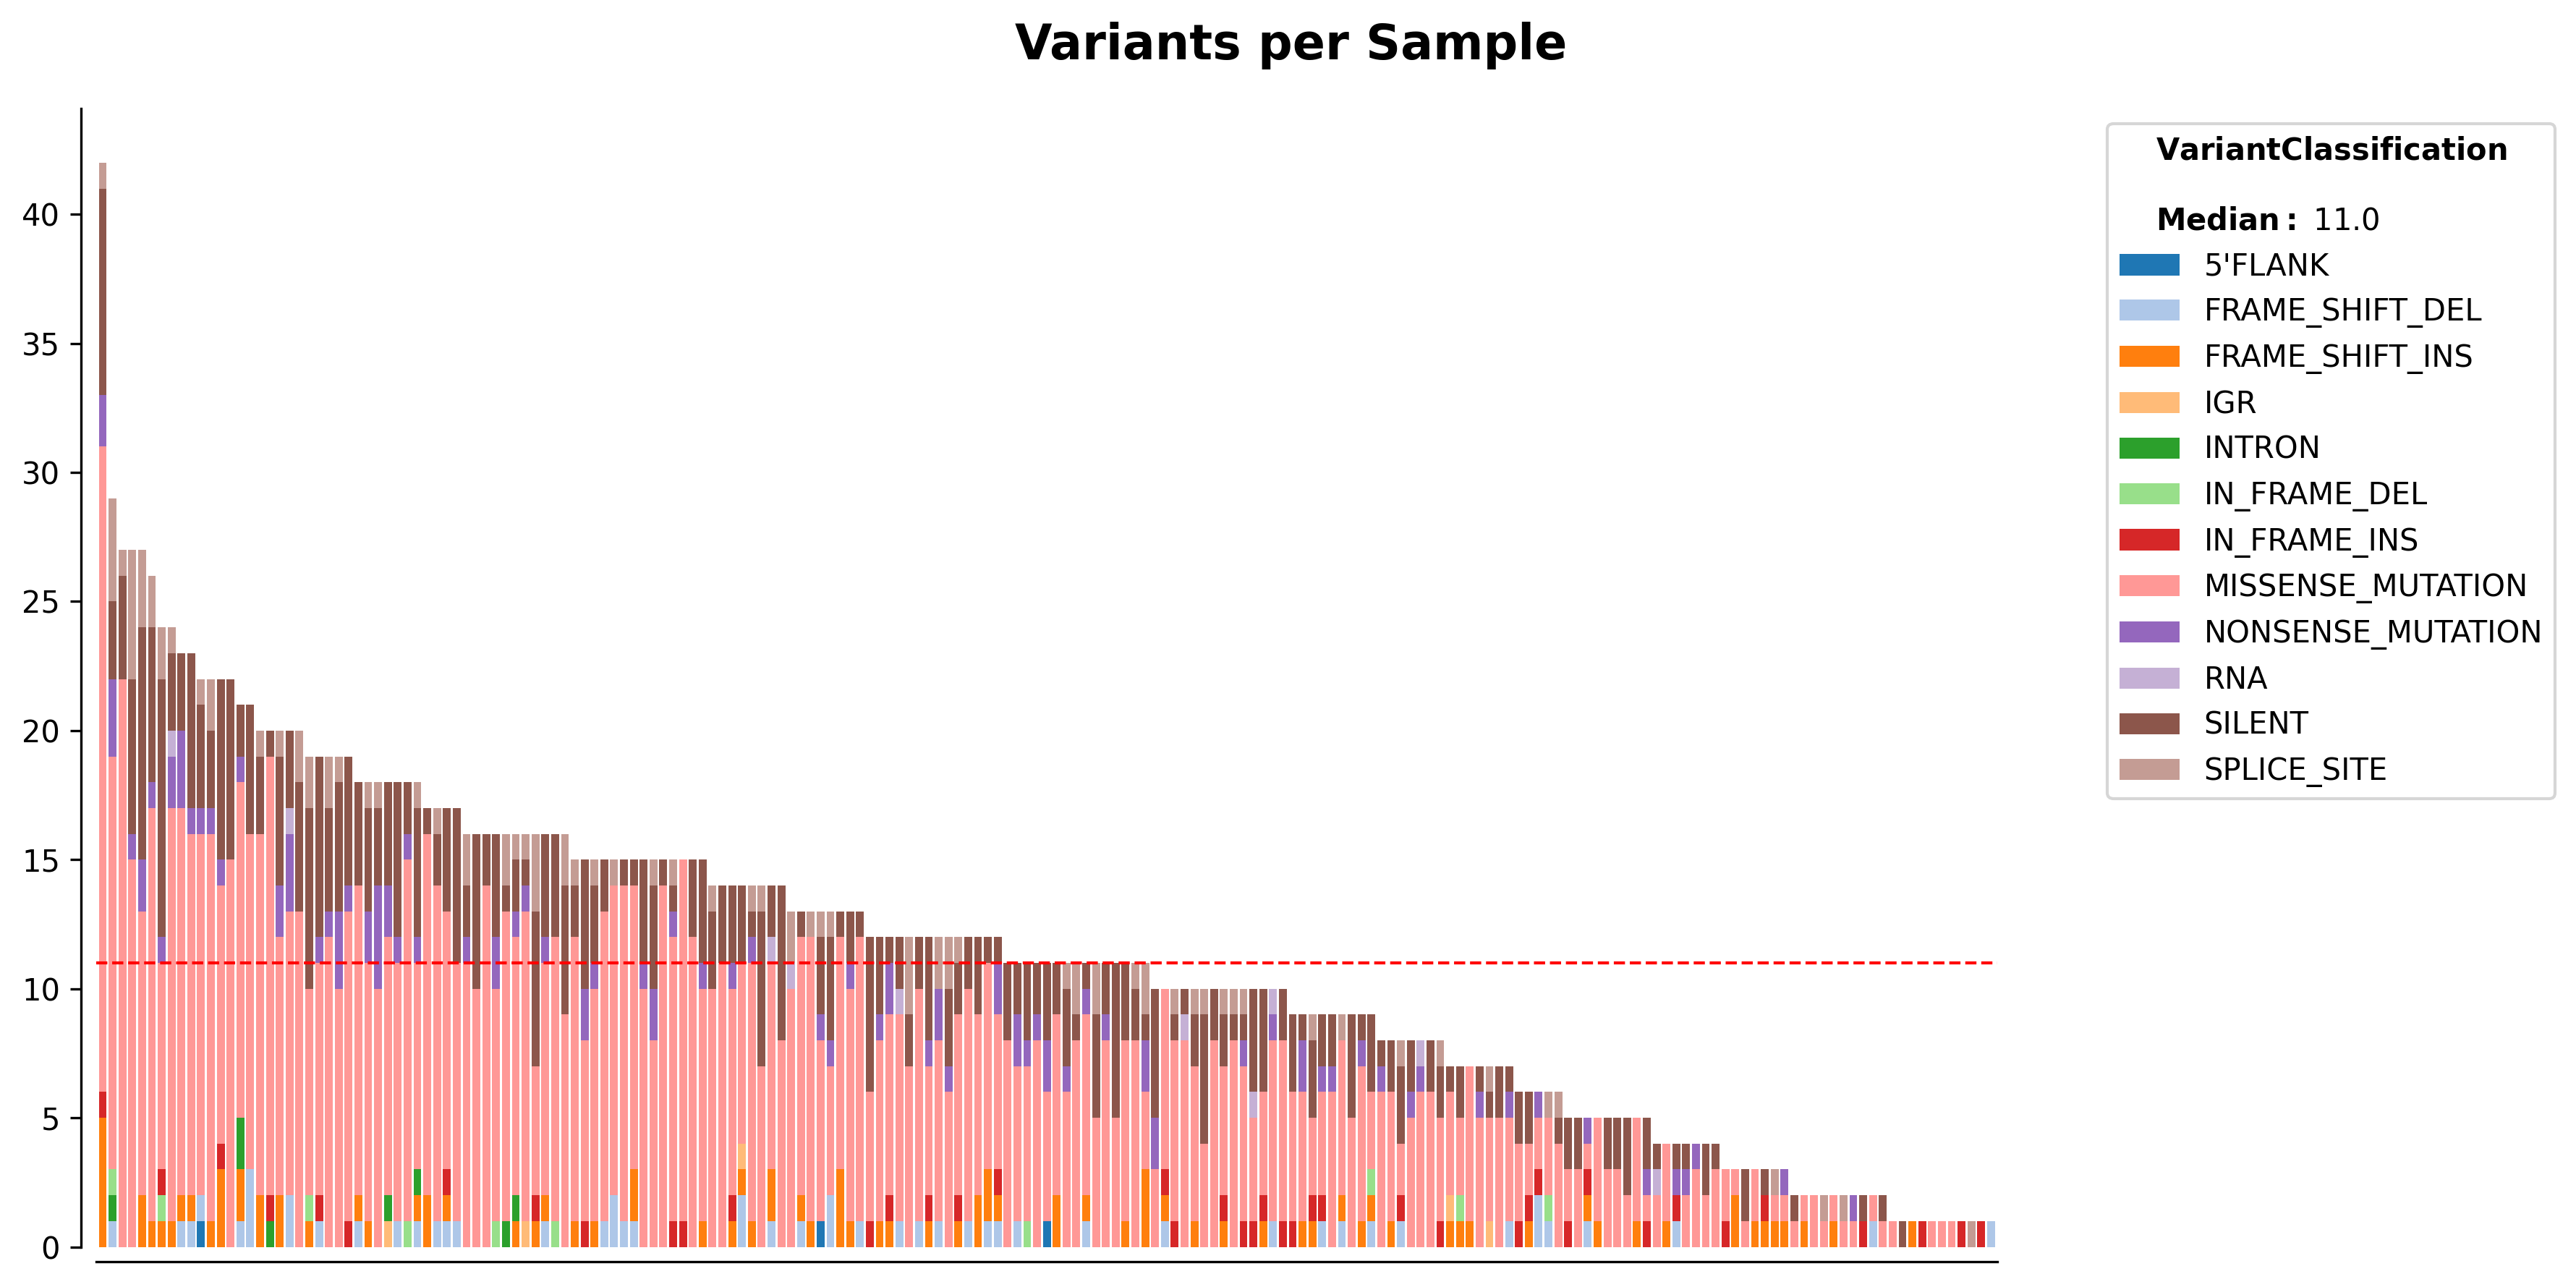

✅ Variants per sample plot saved as 'variants_per_sample.png'


In [31]:
# 5. Variants per Sample Plot (TMB)
print("\n5. Generating variants per sample plot (TMB)...")
tmb_fig = py_mut.variants_per_sample_plot()

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
tmb_fig.savefig('variants_per_sample.png')
print("✅ Variants per sample plot saved as 'variants_per_sample.png'")

In [32]:
# Commented version with all available parameters:
# tmb_fig = py_mut.variants_per_sample_plot(
#     figsize=(12, 6),                      # Figure size in inches (width, height)
#     max_samples=50,                       # Maximum number of samples to display
#     title=\"Variants per Sample\",          # Custom title for the plot
#     variant_column=\"Variant_Classification\", # Column with variant classification
#     sample_column=\"Tumor_Sample_Barcode\", # Column with sample ID
#     show_interactive=True                 # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# tmb_fig.savefig('variants_per_sample.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(tmb_fig, 'variants_per_sample.png')
# tmb_fig.savefig('variants_per_sample.pdf', dpi=300, bbox_inches='tight')

print("📝 TMB plot parameters and saving methods shown above (commented out)")

📝 TMB plot parameters and saving methods shown above (commented out)


---

## 6. 📦 Variant Classification Summary Plot (Boxplot)

Boxplot summary of variant classifications across samples.


6. Generating variant classification summary plot (Boxplot)...
Detected wide format with 193 possible sample columns.
Detected 193 sample columns
Detected sample format: pipe_separated


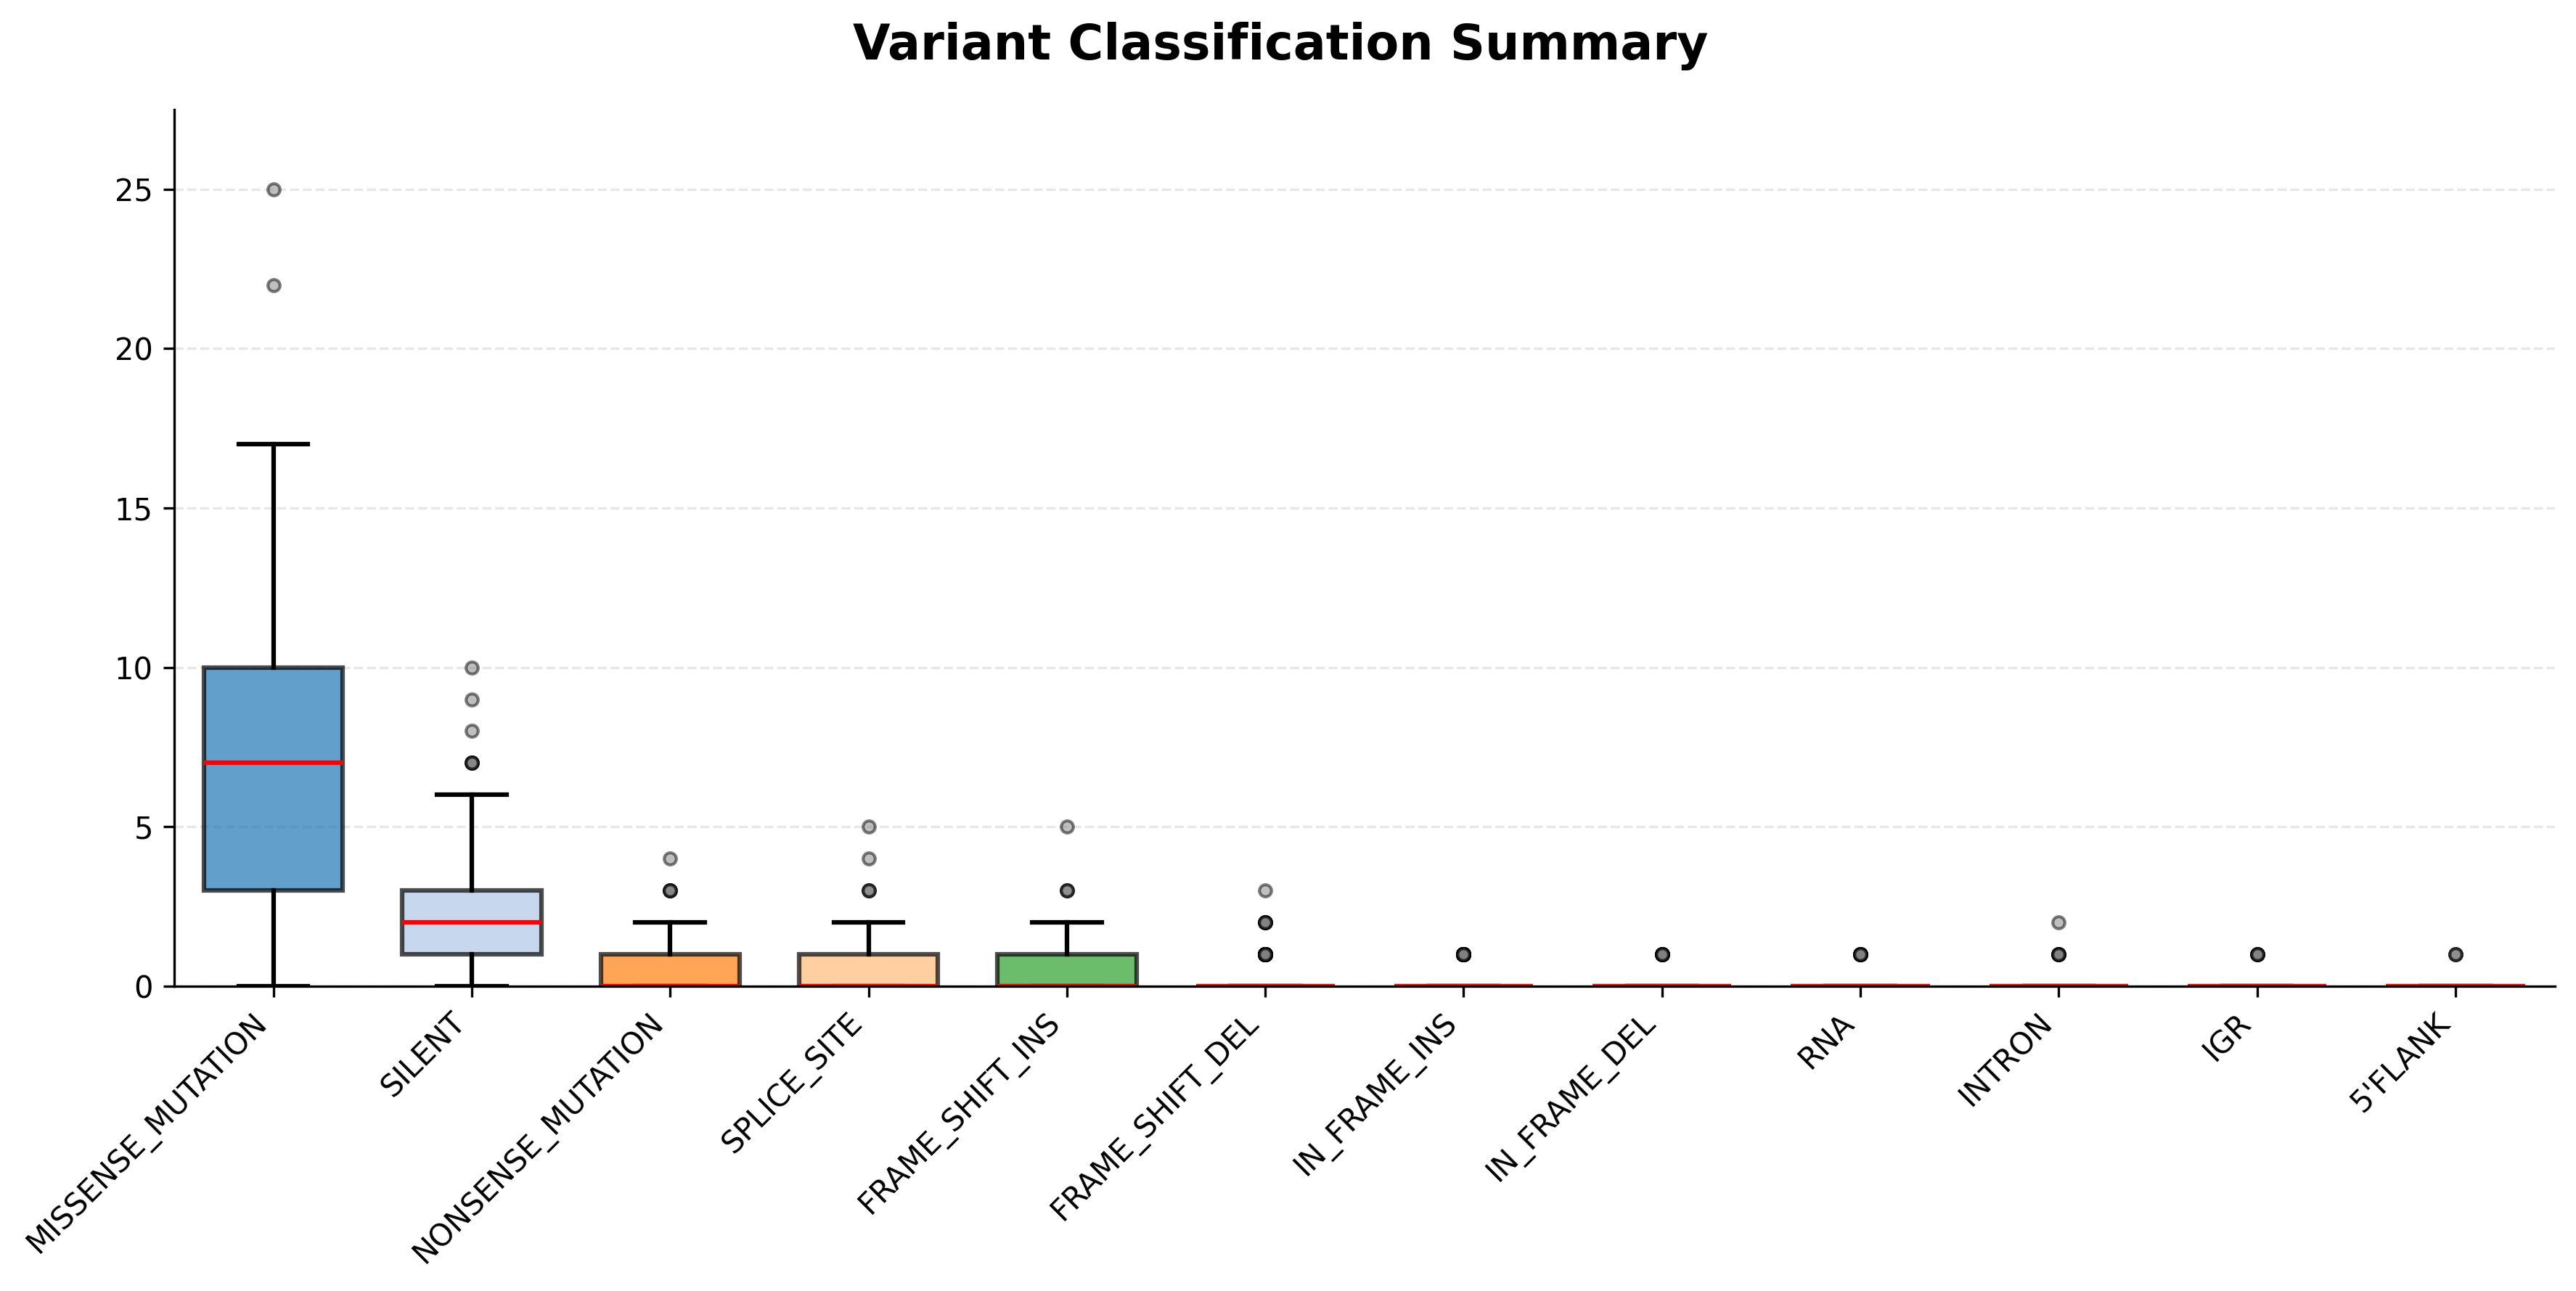

✅ Variant classification summary plot saved as 'variant_classification_summary.png'


In [33]:
# 6. Variant Classification Summary Plot (Boxplot)
print("\n6. Generating variant classification summary plot (Boxplot)...")
vcs_fig = py_mut.variant_classification_summary_plot()

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
vcs_fig.savefig('variant_classification_summary.png')
print("✅ Variant classification summary plot saved as 'variant_classification_summary.png'")

In [36]:
# Commented version with all available parameters:
# vcs_fig = py_mut.variant_classification_summary_plot(
#     figsize=(12, 6),                      # Figure size in inches (width, height)
#     title=\"Variant Classification Summary\", # Custom title for the plot
#     variant_column=\"Variant_Classification\", # Column with variant classification
#     sample_column=\"Tumor_Sample_Barcode\", # Column with sample ID
#     show_interactive=True                 # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# vcs_fig.savefig('variant_classification_summary.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(vcs_fig, 'variant_classification_summary.png')
# vcs_fig.savefig('variant_classification_summary.pdf', dpi=300, bbox_inches='tight')

print("📝 Classification summary parameters and saving methods shown above (commented out)")

📝 Classification summary parameters and saving methods shown above (commented out)


---

## 7a. 🏆 Top Mutated Genes Plot (Variants Mode)

Show genes with the highest total number of mutations.


7a. Generating top mutated genes plot (variants mode)...


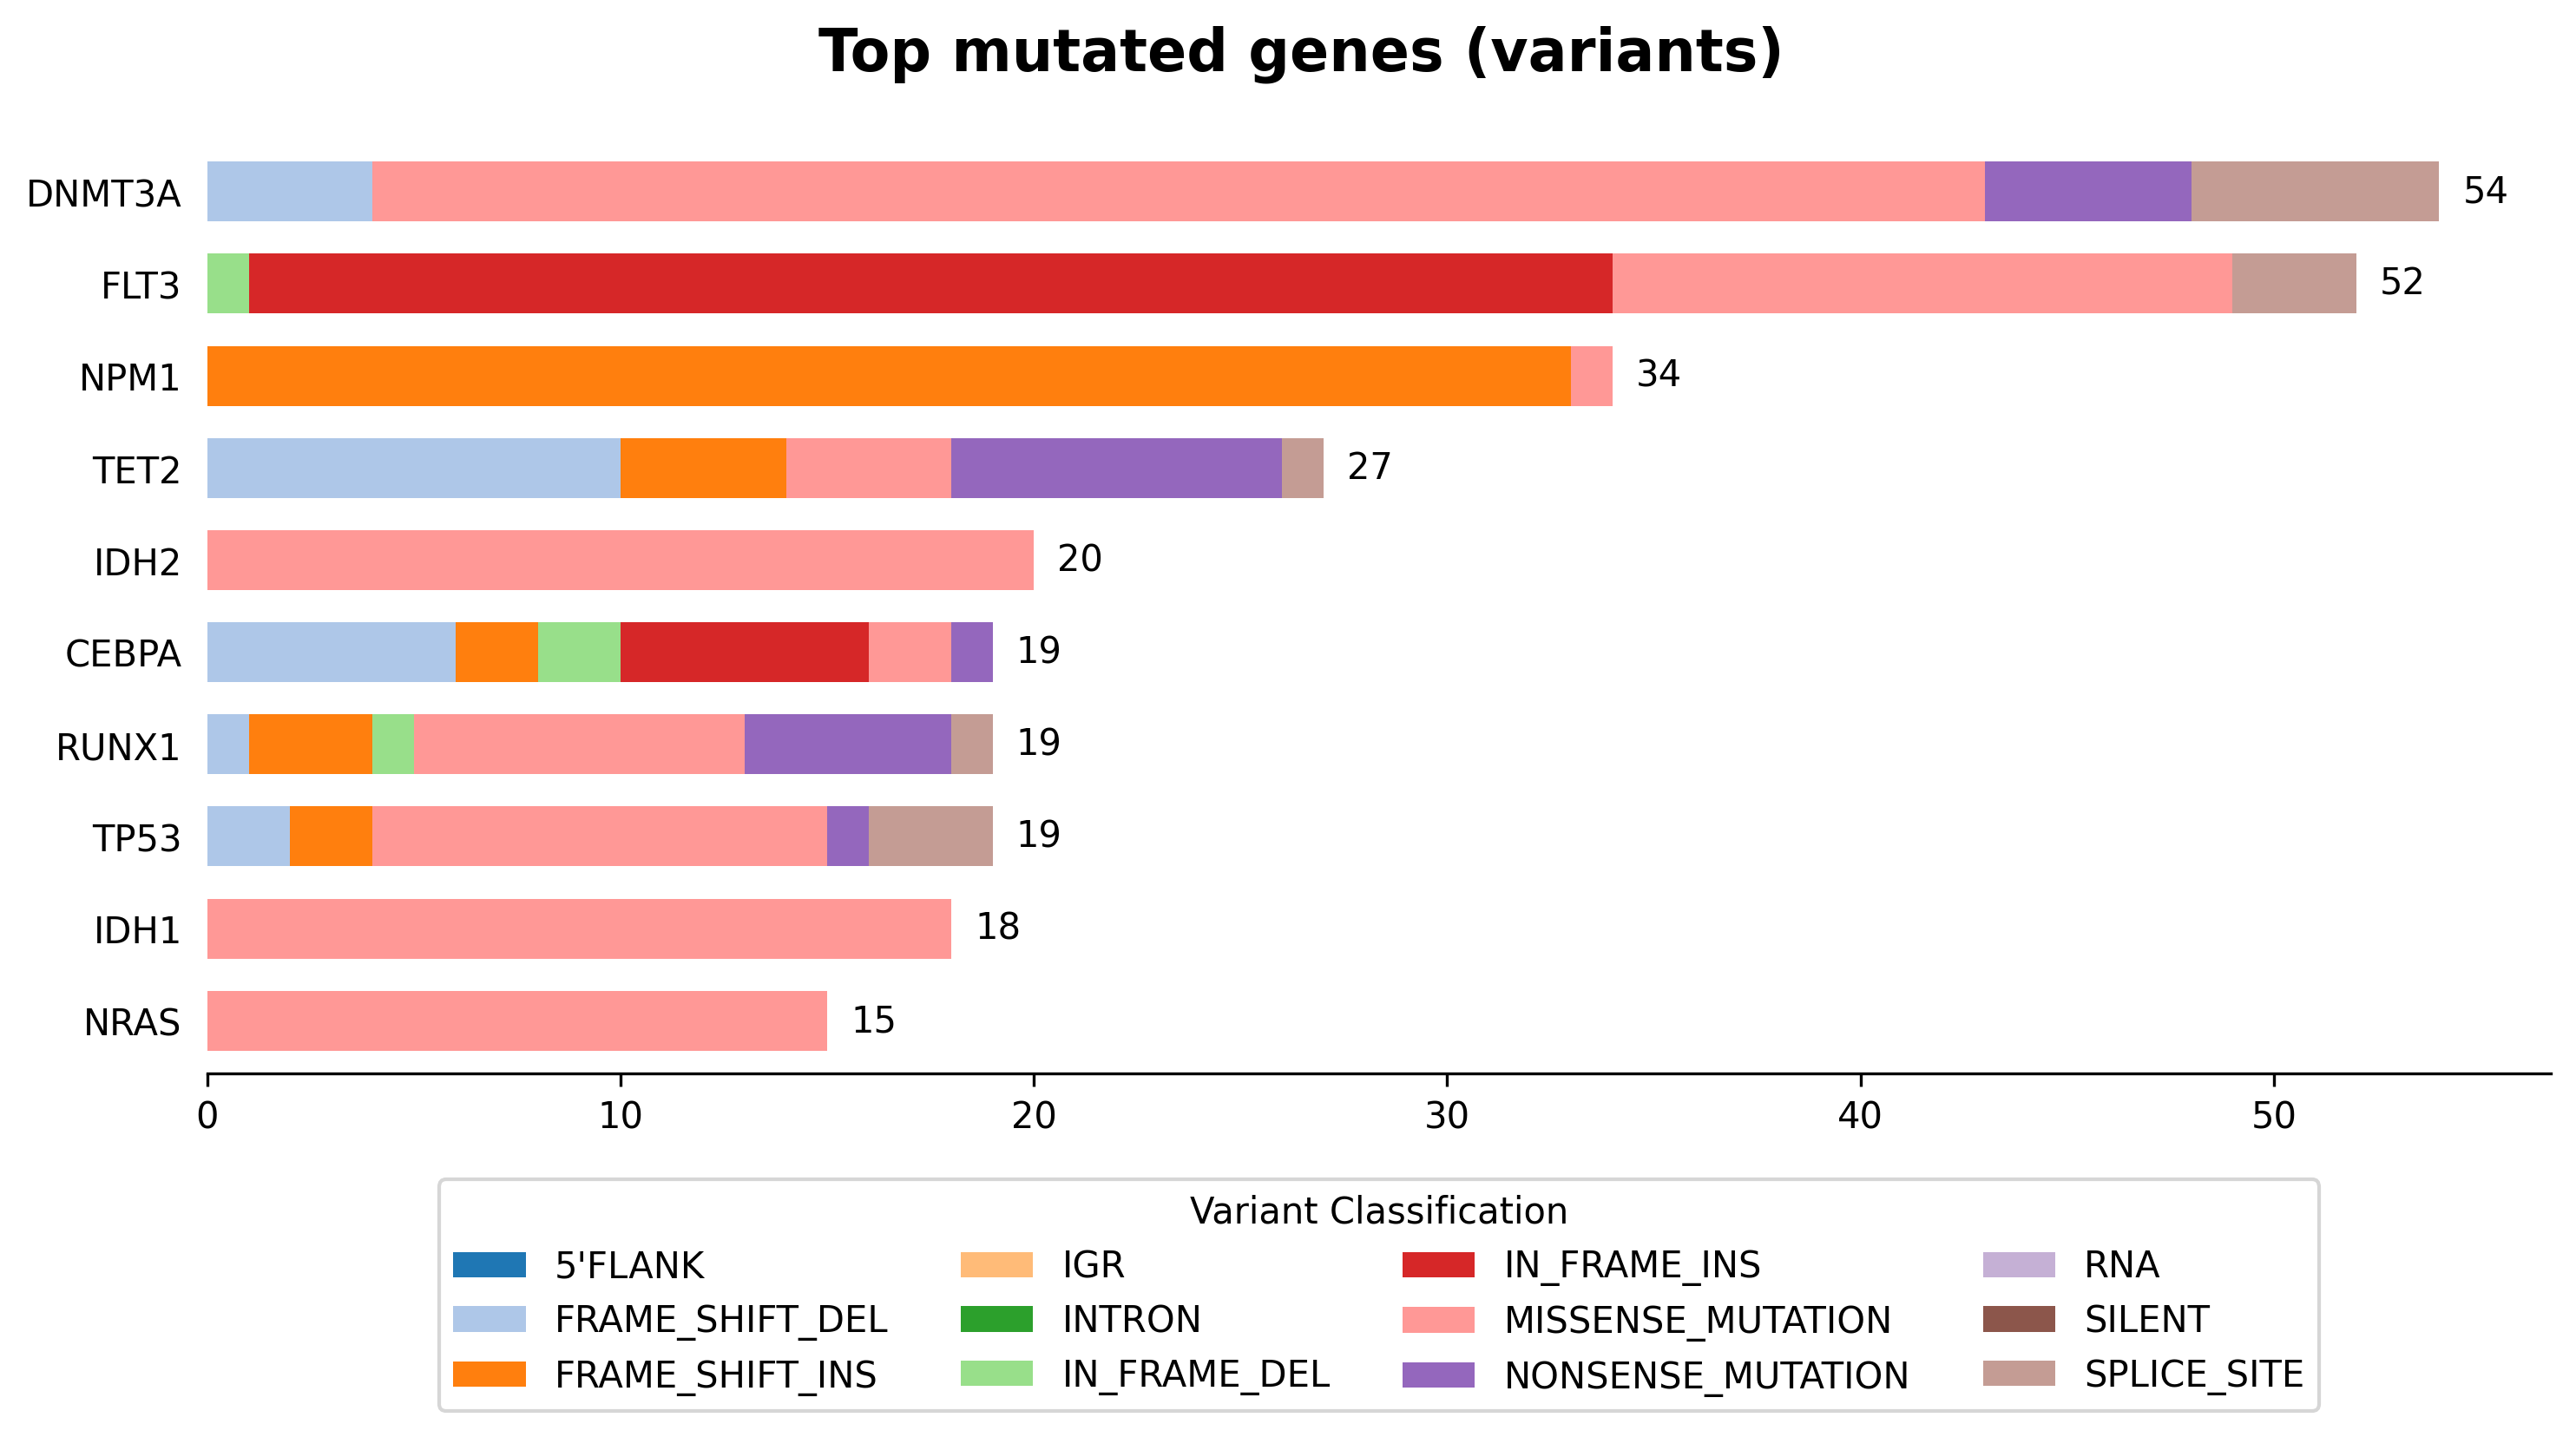

✅ Top mutated genes (variants) plot saved as 'top_mutated_genes_variants.png'


In [39]:
# 7a. Top Mutated Genes Plot (variants mode)
print("\n7a. Generating top mutated genes plot (variants mode)...")
tmg_variants_fig = py_mut.top_mutated_genes_plot(mode="variants")

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
tmg_variants_fig.savefig('top_mutated_genes_variants.png')
print("✅ Top mutated genes (variants) plot saved as 'top_mutated_genes_variants.png'")

In [40]:
# Commented version with all available parameters:
# tmg_variants_fig = py_mut.top_mutated_genes_plot(
#     mode=\"variants\",                      # Counting mode (required): "variants" or "samples"
#     figsize=(12, 6),                      # Figure size in inches (width, height)
#     title=\"Top Mutated Genes\",            # Custom title for the plot
#     variant_column=\"Variant_Classification\", # Column with variant classification
#     gene_column=\"Hugo_Symbol\",            # Column with gene symbol
#     sample_column=\"Tumor_Sample_Barcode\", # Column with sample ID
#     count=10,                             # Number of genes to show (default 10, shows all if less)
#     show_interactive=True                 # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# tmg_variants_fig.savefig('top_mutated_genes_variants.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(tmg_variants_fig, 'top_mutated_genes_variants.png')
# tmg_variants_fig.savefig('top_mutated_genes_variants.pdf', dpi=300, bbox_inches='tight')

print("📝 Top genes (variants mode) parameters and saving methods shown above (commented out)")

📝 Top genes (variants mode) parameters and saving methods shown above (commented out)


---

## 7b. 🏆 Top Mutated Genes Plot (Samples Mode)

Show genes mutated in the highest number of samples (prevalence).


7b. Generating top mutated genes plot (samples mode)...


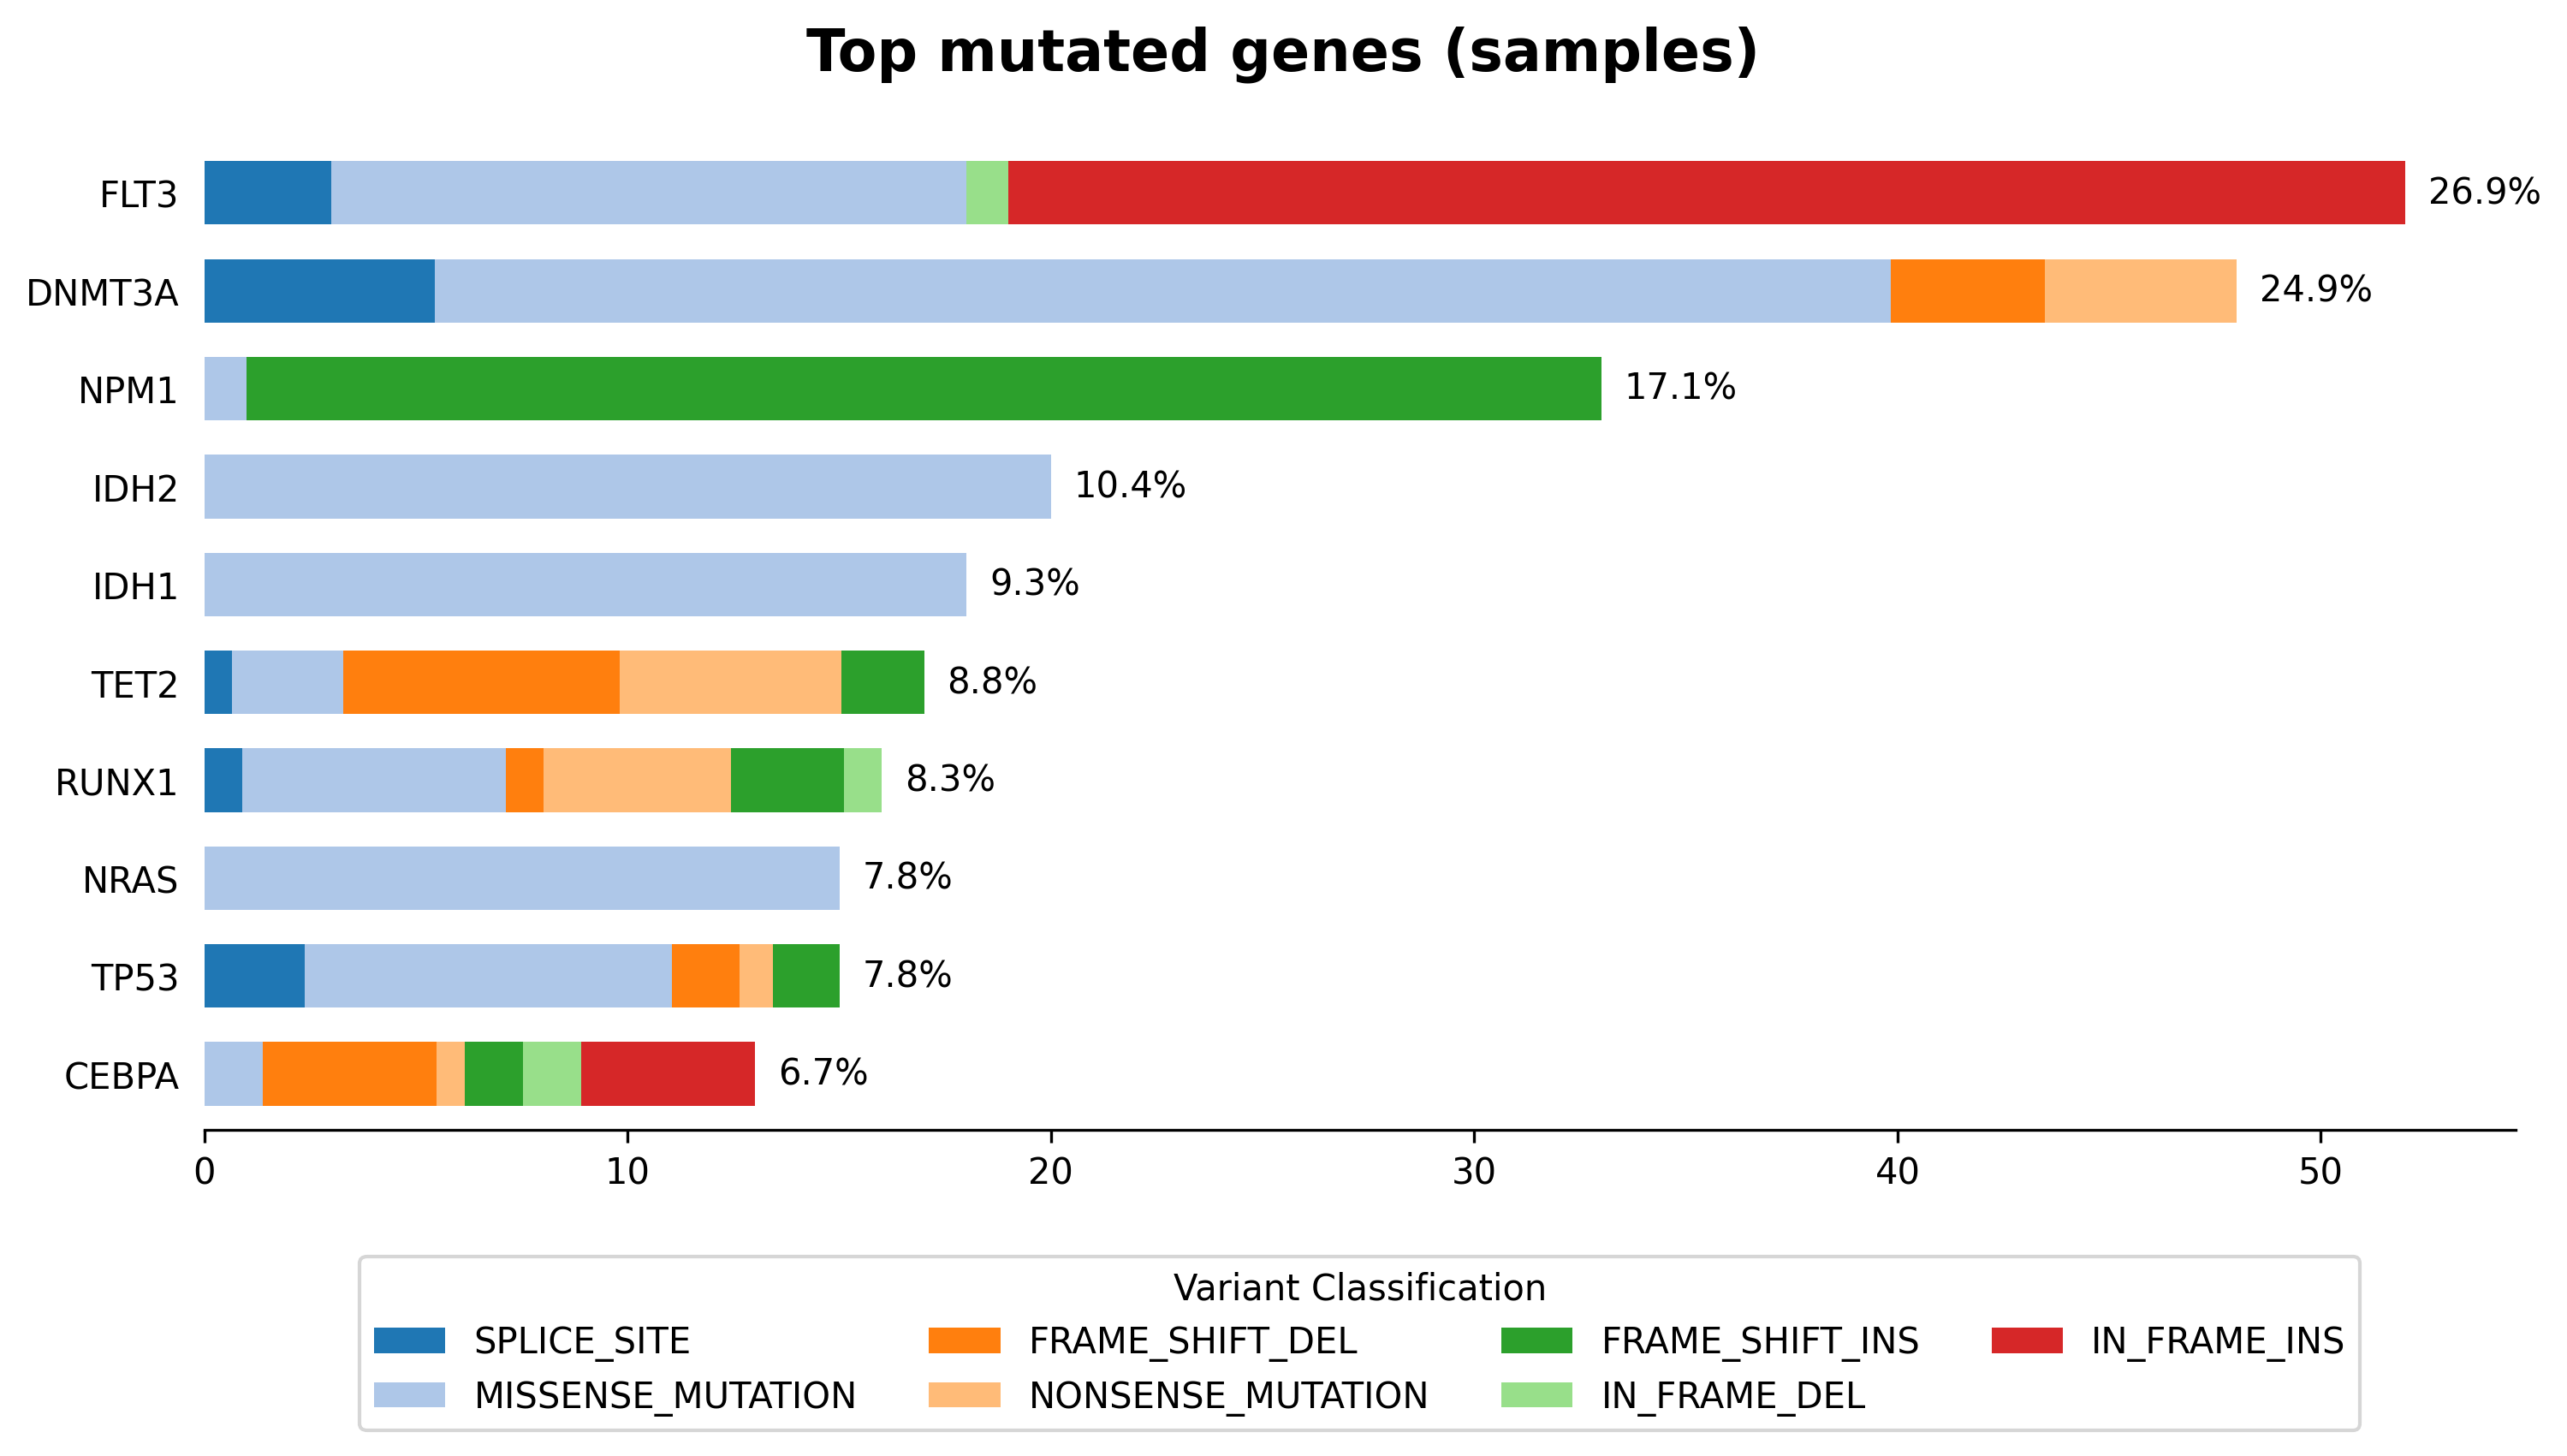

✅ Top mutated genes (samples) plot saved as 'top_mutated_genes_samples.png'


In [41]:
# 7b. Top Mutated Genes Plot (samples mode)
print("\n7b. Generating top mutated genes plot (samples mode)...")
tmg_samples_fig = py_mut.top_mutated_genes_plot(mode="samples")

# Display the plot
plt.show()

# Save the figure (automatically high quality!)
tmg_samples_fig.savefig('top_mutated_genes_samples.png')
print("✅ Top mutated genes (samples) plot saved as 'top_mutated_genes_samples.png'")

In [42]:
# Commented version with all available parameters:
# tmg_samples_fig = py_mut.top_mutated_genes_plot(
#     mode=\"samples\",                       # Counting mode (required): \"variants\" or \"samples\"
#     figsize=(12, 6),                      # Figure size in inches (width, height)
#     title=\"Top Mutated Genes\",            # Custom title for the plot
#     variant_column=\"Variant_Classification\", # Column with variant classification
#     gene_column=\"Hugo_Symbol\",            # Column with gene symbol
#     sample_column=\"Tumor_Sample_Barcode\", # Column with sample ID
#     count=15,                             # Number of genes to show
#     show_interactive=True                 # Whether to show the plot interactively
# )

# Alternative saving methods (commented examples):
# tmg_samples_fig.savefig('top_mutated_genes_samples.png', dpi=300, bbox_inches='tight')
# py_mut.save_figure(tmg_samples_fig, 'top_mutated_genes_samples.png')
# tmg_samples_fig.savefig('top_mutated_genes_samples.pdf', dpi=300, bbox_inches='tight')

print("📝 Top genes (samples mode) parameters and saving methods shown above (commented out)")

📝 Top genes (samples mode) parameters and saving methods shown above (commented out)


---

## 🚀 Advanced Saving Examples

Additional examples for ultra-high quality and multiple format saving.

In [43]:
# Advanced saving examples:

# Ultra-high quality for publications
# py_mut.save_figure(tmg_samples_fig, 'top_mutated_genes_samples_ultra.png', dpi=600)

# Multiple formats at once
# for fmt in ['png', 'pdf', 'svg']:
#     tmg_samples_fig.savefig(f'top_mutated_genes_samples.{fmt}', 
#                            dpi=300 if fmt != 'svg' else None, bbox_inches='tight')

print("📝 Advanced saving examples shown above (commented out)")
print("\n🎯 All individual plots have been generated and saved!")

📝 Advanced saving examples shown above (commented out)

🎯 All individual plots have been generated and saved!


---

# ✅ Analysis Complete!

## 📋 Summary of Generated Plots:

1. ✅ **Summary Plot** - `summary_plot.png`
2. ✅ **Variant Classification** - `variant_classification.png`
3. ✅ **Variant Type** - `variant_type.png`
4. ✅ **SNV Class** - `snv_class.png`
5. ✅ **Variants per Sample (TMB)** - `variants_per_sample.png`
6. ✅ **Classification Summary** - `variant_classification_summary.png`
7. ✅ **Top Genes (Variants)** - `top_mutated_genes_variants.png`
8. ✅ **Top Genes (Samples)** - `top_mutated_genes_samples.png`

## 🎯 Key Features Demonstrated:

- **Automatic High Quality**: All plots saved with DPI=300 and optimized margins
- **Parameter Documentation**: Every method shown with full parameter options
- **Saving Flexibility**: Multiple saving methods and formats demonstrated
- **Interactive Options**: Ready for both Jupyter and script usage
- **Data Format Handling**: Automatic detection and processing of wide/long formats

## 🚀 Next Steps:

- Customize parameters for your specific datasets
- Try different figure sizes and quality settings
- Explore interactive mode by setting `show_interactive=True`
- Use the saving examples for different output formats
- Load your own mutation data and run the same analysis

**All plots are now ready for use in presentations, publications, or further analysis!** 📊✨